### Compared to Employment

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [30]:
unemployment = pd.read_csv("/Users/sunevan/Dropbox/Spring 2017/Big Data/ds1004project/part 2/NYC Unemployment  rate.csv")
unemployment.head()
unemployment_key  =list()

#for i in range(unemployment.shape[0]):
look_up = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05','Dec':'12',
            'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11'}

unemployment['Month'] = unemployment['Month'].apply(lambda x: look_up[x])    

#unemployment['key'] = unemployment[['Year','Month']].apply(lambda x: ''.join(x), axis=1) 
unemployment["Key"]= unemployment["Year"].astype(str)+' '+unemployment["Month"]


In [31]:
unemployment.index=unemployment["Key"]

In [32]:
crime.head()
look_up = {'1': '01', '2': '02', '3': '03', '4': '04', '5': '05','12':'12',
            '6': '06', '7': '07', '8': '08', '9': '09', '10': '10', '11': '11'}

crime['Month'] = crime['month'].astype(str).apply(lambda x: look_up[x]) 

In [33]:
crime["Key"]= crime["year"].astype(str)+' '+crime["Month"]

In [34]:
crime_n = crime.groupby(["Key"],sort=True).sum()

In [35]:
crime_n["Key"] = list(crime_n.index)

In [36]:
m = pd.merge(crime_n, unemployment, on = "Key",how='left')
m.to_csv("unemployment_and_crime.csv")

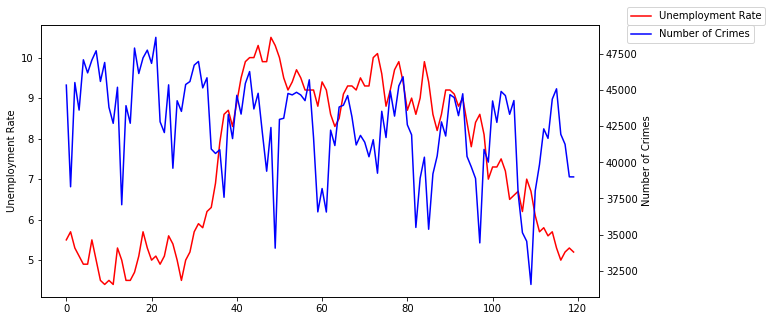

In [37]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1.plot(list(m["""Unemployment Rate (%)"""]),color = "red",label ="Unemployment Rate")

ax1.set_ylabel("Unemployment Rate")

plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)


ax2 = ax1.twinx()
ax2.plot(list(m["freq"]),color = "blue", label = "Number of Crimes")

ax2.set_ylabel("Number of Crimes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [38]:
numpy.corrcoef(m["freq"],m["""Unemployment Rate (%)"""])[1,0]

-0.23303916187164531